In [ ]:
#======================
TimeSeries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\rajkr\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("C:/Users/rajkr/OneDrive/Documents/time_series.csv")
df


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [3]:
df.head()


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
df.columns


Index(['date', 'Ex_rate'], dtype='object')

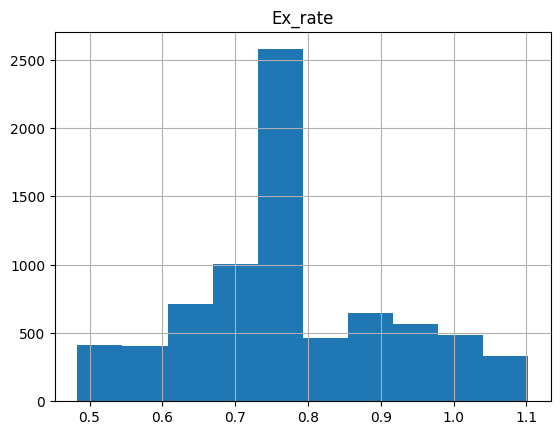

In [5]:
#line plot
from matplotlib import pyplot
df.hist()
pyplot.show()#from histgram we can say that the max Ex_rate is between(0.7-0.8)


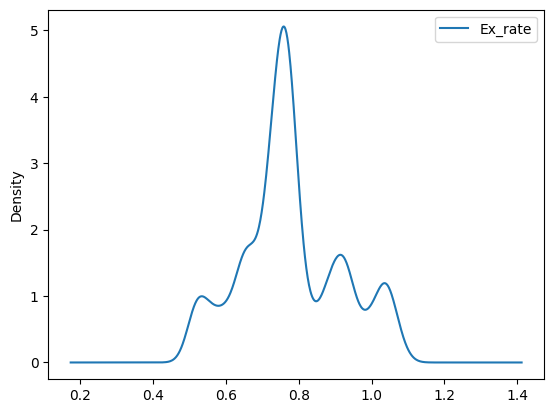

In [6]:
#create a density plot
df.plot(kind='kde')
pyplot.show()


In [7]:
#carry out some descriptive statistics
print(df.describe())


           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


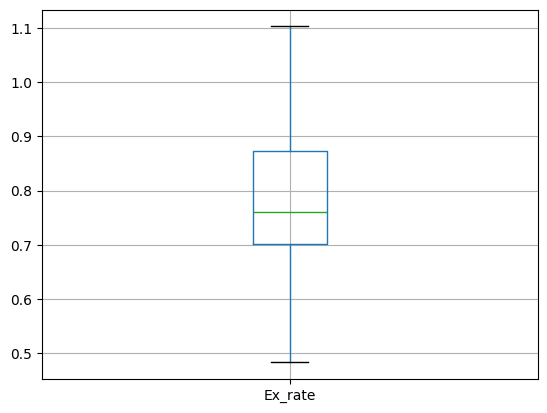

In [8]:
#boxplot
df.boxplot()
pyplot.show()


In [9]:
#Scaling is a very strong Seasonality integrant

import pandas
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('C:/Users/rajkr/OneDrive/Documents/time_series.csv',parse_dates=True,header=0,index_col=0)
print(df.head())


                  Ex_rate
date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849


In [10]:
#convert data into matrix of row-col vectors
values= df.values
values= values.reshape((len(values),1))


In [11]:
#feature scaling
Scaler=MinMaxScaler(feature_range=(0,1))#In our data we dont have outliers so minimax solves our purpose better


In [12]:
#fit the scaler with train data to get MinMax value
scaler=Scaler.fit(values)
print('Min:%f,Max:%f'%(Scaler.data_min_,Scaler.data_max_))


Min:0.483297,Max:1.102536


C:\Users\rajkr\AppData\Local\Temp\ipykernel_876\3615402163.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Min:%f,Max:%f'%(Scaler.data_min_,Scaler.data_max_))


In [13]:
#normalise the data and sanity check
normalized= Scaler.transform(values)
for i in range(5):
    print(normalized[i])


[0.4880232]
[0.48204813]
[0.48996107]
[0.48883065]
[0.48705427]


In [14]:
#inverse transform to obtain original values
original_matrix=Scaler.inverse_transform(normalized)
for i in range(5):
    print(original_matrix[i])


[0.7855]
[0.7818]
[0.7867]
[0.786]
[0.7849]


In [15]:
#Lets calculate the mean(rolling window statistics)
from pandas import DataFrame
from pandas import concat
df=DataFrame(df.values)
tshifts=df.shift(1)
rwin=tshifts.rolling(window=2)
moving_avg=rwin.mean()
joined_df=concat([moving_avg,df],axis=1)
joined_df.columns=['mean(t-2,t-1)','t+1']
print(joined_df.head(5))


   mean(t-2,t-1)     t+1
0            NaN  0.7855
1            NaN  0.7818
2        0.78365  0.7867
3        0.78425  0.7860
4        0.78635  0.7849


In [16]:
#Expanding window statistics
window=tshifts.expanding()
joined_df2=concat([rwin.mean(),df.shift(-1)],axis=1)
joined_df2.columns=['mean','t+1']
print(joined_df2.head(5))



      mean     t+1
0      NaN  0.7818
1      NaN  0.7867
2  0.78365  0.7860
3  0.78425  0.7849
4  0.78635  0.7866


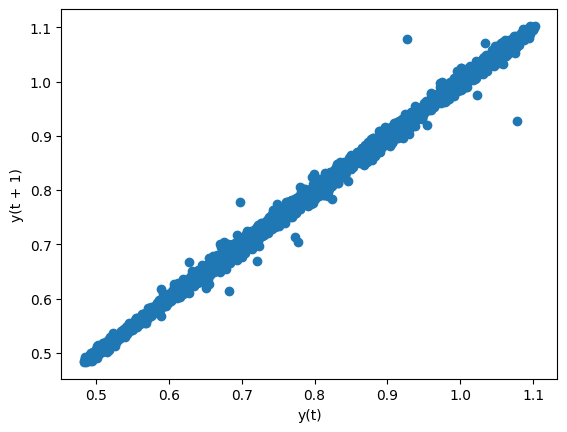

In [17]:
#Scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(df)
pyplot.show()


<Figure size 1000x1000 with 0 Axes>

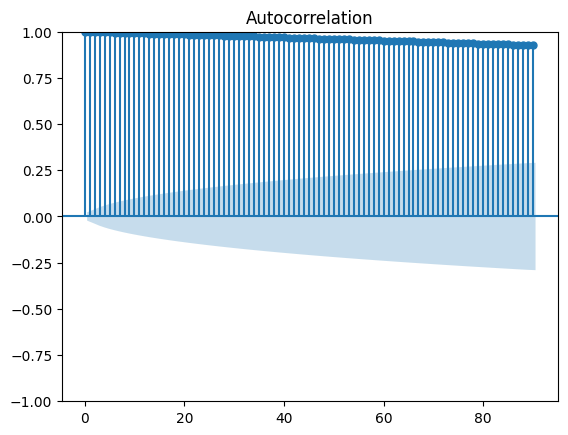

In [18]:
#Auto correlation and partial auto correlation

pyplot.figure(figsize=(10,10))
from statsmodels.graphics.tsaplots import plot_acf
df=pd.read_csv('C:/Users/rajkr/OneDrive/Documents/time_series.csv',header=0,index_col=0,parse_dates=True)
plot_acf(df,lags=90)
pyplot.show()


In [19]:
#calculations
df1=pd.read_csv('C:/Users/rajkr/OneDrive/Documents/time_series1.csv')    
df1


,date,Ex_rate,t
0,01-01-1990 00:00,0.785500,1
1,02-01-1990 00:00,0.781800,2
2,03-01-1990 00:00,0.786700,3
3,04-01-1990 00:00,0.786000,4
4,05-01-1990 00:00,0.784900,5
...,...,...,...
7583,06-10-2010 00:00,0.718494,7584
7584,07-10-2010 00:00,0.721839,7585
7585,08-10-2010 00:00,0.723197,7586
7586,09-10-2010 00:00,0.720825,7587


In [20]:
list(df1)
df1.date


0       01-01-1990 00:00
1       02-01-1990 00:00
2       03-01-1990 00:00
3       04-01-1990 00:00
4       05-01-1990 00:00
              ...       
7583    06-10-2010 00:00
7584    07-10-2010 00:00
7585    08-10-2010 00:00
7586    09-10-2010 00:00
7587    10-10-2010 00:00
Name: date, Length: 7588, dtype: object

In [21]:
#Split
df1.shape
Train=df1.head(5000)
Test=df1.tail(2588)


In [22]:
import statsmodels.formula.api as smf
import numpy as np


In [23]:
#linear model
linear_model=smf.ols('Ex_rate~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Ex_rate'])-np.array(pred_linear))**2))
rmse_linear


0.20727010235265578

In [24]:
#here our rmse_linear is getting (0.20) which we can say that is a decent score
#so we can say that around 80% of Ex_rate can be predicted correctly
